In [2]:
# example: here ,using lung_dfs_cis as input , can use any other file in its place like lung_dfs_car or brca_dfs_pac



import warnings
warnings.filterwarnings("ignore")
#ignore warnings
import pandas as pd

#lung_dfs_car=pd.read_csv('lung_dfs_car.csv')
lung_dfs_cis=pd.read_csv('/Users/priyamvadakumar/Desktop/research/data/lung_dfs_cis.csv')

print(lung_dfs_cis)







    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [3]:
#checking numerical and categorical variables
num_vars= lung_dfs_cis.columns[lung_dfs_cis.dtypes != 'object']
cat_vars= lung_dfs_cis.columns[lung_dfs_cis.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['status', 'months', 'lg_clone_snv', 'lg_clone_cnv', 'branch_mean',
       'branch_max', 'branch_var', 'height', 'cnv_rate', 'snv_rate',
       ...
       'race', 'pathologic_stage|stage ia', 'pathologic_stage|stage ib',
       'pathologic_stage|stage iia', 'pathologic_stage|stage iib',
       'pathologic_stage|stage iiia', 'anatomic_neoplasm_subdivision|l-upper',
       'anatomic_neoplasm_subdivision|r-upper',
       'anatomic_neoplasm_subdivision|l-lower',
       'anatomic_neoplasm_subdivision|r-lower'],
      dtype='object', length=131)
Index(['measure_of_response'], dtype='object')


In [4]:
# checking total drug response types and their counts


responses=lung_dfs_cis['measure_of_response'].unique()
print(responses)
print(lung_dfs_cis['measure_of_response'].value_counts())

['Complete Response' 'Partial Response' 'Stable Disease'
 'Clinical Progressive Disease']
Complete Response               31
Clinical Progressive Disease     5
Stable Disease                   4
Partial Response                 1
Name: measure_of_response, dtype: int64


In [5]:
# merging stable, partial and clinical progressive response into incomplete response 
# so measure_of_response is binary 


check= lung_dfs_cis["measure_of_response"].replace(['Clinical Progressive Disease','Stable Disease','Partial Response'],'Incomplete Response')
print(check)




responses=check.unique()
print(responses)
print(check.value_counts())

0       Complete Response
1       Complete Response
2       Complete Response
3     Incomplete Response
4       Complete Response
5       Complete Response
6     Incomplete Response
7     Incomplete Response
8     Incomplete Response
9       Complete Response
10      Complete Response
11      Complete Response
12      Complete Response
13      Complete Response
14      Complete Response
15      Complete Response
16      Complete Response
17      Complete Response
18      Complete Response
19      Complete Response
20    Incomplete Response
21      Complete Response
22      Complete Response
23      Complete Response
24      Complete Response
25      Complete Response
26      Complete Response
27      Complete Response
28    Incomplete Response
29      Complete Response
30    Incomplete Response
31      Complete Response
32      Complete Response
33      Complete Response
34      Complete Response
35    Incomplete Response
36    Incomplete Response
37    Incomplete Response
38      Comp

In [6]:
# make new datset with dropped original measure_of_reponses col


lung_dfs_cis_datasets = lung_dfs_cis.drop(columns=['measure_of_response'])

In [7]:
# add new response to new dataset 


lung_dfs_cis_datasets['Response']=check


print(lung_dfs_cis_datasets)

respon=lung_dfs_cis_datasets['Response'].unique()
print(respon)
print(lung_dfs_cis_datasets['Response'].value_counts())



    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [8]:
# encoding response variable 
import numpy as np
from sklearn.preprocessing import LabelEncoder
y=lung_dfs_cis_datasets['Response']
print(y)
y=LabelEncoder().fit_transform(y)
print(y)
print(np.unique(y))



0       Complete Response
1       Complete Response
2       Complete Response
3     Incomplete Response
4       Complete Response
5       Complete Response
6     Incomplete Response
7     Incomplete Response
8     Incomplete Response
9       Complete Response
10      Complete Response
11      Complete Response
12      Complete Response
13      Complete Response
14      Complete Response
15      Complete Response
16      Complete Response
17      Complete Response
18      Complete Response
19      Complete Response
20    Incomplete Response
21      Complete Response
22      Complete Response
23      Complete Response
24      Complete Response
25      Complete Response
26      Complete Response
27      Complete Response
28    Incomplete Response
29      Complete Response
30    Incomplete Response
31      Complete Response
32      Complete Response
33      Complete Response
34      Complete Response
35    Incomplete Response
36    Incomplete Response
37    Incomplete Response
38      Comp

In [9]:
#insert response column
lung_dfs_cis_datasets['Response']=y
print(lung_dfs_cis_datasets['Response'])

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
30    1
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    0
39    0
40    0
Name: Response, dtype: int64


In [10]:
print(lung_dfs_cis_datasets)

    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [11]:
# word featutres is used for features in the dataframe format and X is used for features in numpy format
# only features
features=lung_dfs_cis_datasets.iloc[:, :-1]
print(features)
print(features.shape)

    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [12]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [13]:
# convert features into numpy to enable use of sklearn
X=features.to_numpy()
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0.         18.56299426  0.95510541 ...  0.          1.
   0.        ]
 [ 1.         12.97766855  0.71049166 ...  1.          0.
   0.        ]
 [ 1.         26.11961139  0.5993773  ...  0.          1.
   0.        ]
 ...
 [ 0.         25.98819196  0.86525696 ...  0.          0.
   0.        ]
 [ 1.         10.31642513  0.23453446 ...  0.          0.
   1.        ]
 [ 0.         48.42805936  0.62795531 ...  1.          0.
   0.        ]]


In [14]:
print(X.shape)

(41, 131)


In [15]:
#train, test split with stratification

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27, 131) (14, 131) (27,) (14,)


In [16]:
#if want to standardize data 

# #standardisation of X_train and X_test, separately
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# features_train_transformed = pd.DataFrame(ss.fit_transform(X_train),columns = features.columns)
# features_test_transformed = pd.DataFrame(ss.fit_transform(X_test),columns = features.columns)

In [17]:
# # normalizing  X_train and X_test, separately 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = features.columns)
features_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns = features.columns)

In [18]:
print(type(features_train_scaled))
print(features_train_scaled.shape)
print(features_train_scaled)


<class 'pandas.core.frame.DataFrame'>
(27, 131)
    status    months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0      0.0  0.631034      0.873922      0.917781     0.893715    0.891543   
1      1.0  0.660345      0.671681      0.829808     0.713581    0.708026   
2      0.0  0.876724      0.529166      0.579013     0.551695    0.549708   
3      1.0  0.143103      0.731919      0.659735     0.729145    0.721432   
4      1.0  0.681897      0.625747      0.890640     0.702965    0.704413   
5      0.0  0.668966      0.000000      0.000000     0.000000    0.000000   
6      0.0  1.000000      0.350647      0.310748     0.349693    0.335171   
7      1.0  0.437069      0.232058      0.476621     0.304662    0.292468   
8      1.0  0.146552      0.368785      0.678533     0.470808    0.462800   
9      0.0  0.552586      0.684917      0.817243     0.721567    0.714086   
10     1.0  0.132759      0.419862      0.085508     0.374648    0.365783   
11     1.0  0.262931      0.

In [19]:
print(type(features_test_scaled))
print(features_test_scaled.shape)
print(features_test_scaled)

<class 'pandas.core.frame.DataFrame'>
(14, 131)
    status    months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0      1.0  0.216981      0.660528      0.677916     0.659409    0.661940   
1      0.0  0.340348      1.000000      1.000000     1.000000    1.000000   
2      0.0  0.287373      0.260903      0.897571     0.475263    0.469521   
3      1.0  0.558055      0.555723      0.305862     0.528594    0.520136   
4      0.0  1.000000      0.545985      0.580800     0.554862    0.550498   
5      1.0  0.158200      0.000000      0.000000     0.000000    0.000000   
6      0.0  0.309144      0.650057      0.658661     0.661926    0.660216   
7      1.0  0.290276      0.436802      0.425161     0.441862    0.448539   
8      0.0  0.097242      0.358887      0.572223     0.417586    0.411153   
9      0.0  0.174891      0.113425      0.083763     0.119426    0.114255   
10     1.0  0.000000      0.860835      0.036803     0.799623    0.798807   
11     0.0  0.707547      0.

# ANOVA

In [20]:
#ANOVA f test  based filtering


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs


# feature selection
X_train_fs, fs = select_features(features_train_scaled, y_train)
# what are scores for the features

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))



Feature 0: 19.444444
Feature 1: 10.045293
Feature 2: 0.010025
Feature 3: 2.325020
Feature 4: 0.038881
Feature 5: 0.038690
Feature 6: 0.143154
Feature 7: 0.034493
Feature 8: 1.835702
Feature 9: 0.004893
Feature 10: 2.120092
Feature 11: 1.117056
Feature 12: 0.126433
Feature 13: 0.083795
Feature 14: 0.551457
Feature 15: 0.013024
Feature 16: 0.258941
Feature 17: 0.013476
Feature 18: 0.001822
Feature 19: 0.181329
Feature 20: 0.028855
Feature 21: 0.014075
Feature 22: 0.515928
Feature 23: 0.016459
Feature 24: 0.141207
Feature 25: 0.120088
Feature 26: 0.418931
Feature 27: 0.266490
Feature 28: 0.366905
Feature 29: 1.168309
Feature 30: 1.167656
Feature 31: 0.030975
Feature 32: 0.115419
Feature 33: 0.048632
Feature 34: 0.016741
Feature 35: 0.344405
Feature 36: 0.934244
Feature 37: 0.023332
Feature 38: 0.126402
Feature 39: 0.224496
Feature 40: 0.312175
Feature 41: 0.395696
Feature 42: 1.863843
Feature 43: 0.638987
Feature 44: 0.044366
Feature 45: 1.574199
Feature 46: 0.001897
Feature 47: 2.454647


In [21]:
print(X_train_fs.shape)
print(X_train_fs)

(27, 131)
[[0.         0.63103448 0.87392184 ... 1.         0.         0.        ]
 [1.         0.66034483 0.6716806  ... 0.         1.         0.        ]
 [0.         0.87672414 0.52916595 ... 0.         0.         1.        ]
 ...
 [1.         0.26896552 0.17986037 ... 0.         0.         0.        ]
 [1.         0.31982759 0.90661241 ... 1.         0.         0.        ]
 [0.         0.83103448 0.2117873  ... 1.         0.         0.        ]]


In [22]:
l=[(i, fs.scores_[i]) for i in range(len(fs.scores_))]
print(l) 

[(0, 19.444444444444446), (1, 10.04529340320793), (2, 0.010024702812404942), (3, 2.3250201863331594), (4, 0.038881113007643825), (5, 0.03868995371656205), (6, 0.1431538391789265), (7, 0.034493496689573605), (8, 1.8357018544760555), (9, 0.004893000740223684), (10, 2.1200916352969315), (11, 1.117056049723419), (12, 0.1264334622981965), (13, 0.0837946244249124), (14, 0.5514565445157359), (15, 0.013024068976477319), (16, 0.25894057580356405), (17, 0.013475648964896492), (18, 0.0018215448284966578), (19, 0.18132860681699967), (20, 0.028855363190658293), (21, 0.01407491861533942), (22, 0.5159280332478607), (23, 0.01645869185416447), (24, 0.14120748278514728), (25, 0.1200879668219404), (26, 0.41893082186182745), (27, 0.26649046653500236), (28, 0.3669049922295115), (29, 1.1683092757688451), (30, 1.167655952041523), (31, 0.03097488194516381), (32, 0.11541918197459414), (33, 0.048632099159571875), (34, 0.01674112658673792), (35, 0.3444049220097676), (36, 0.9342436935744072), (37, 0.0233320005295

In [354]:
# set value of threshold to filter features. 
# Here filtered features with ANOVA f-test scores equal to or higher than 1

counter=0
lst=[]
for i,j in l:
    if j>=1:
        counter+=1 
        lst.append((i,j))
        
        
print(counter) 
print(lst)

# can pick different values for threshold to filter features


24
[(0, 19.444444444444446), (1, 10.04529340320793), (3, 2.3250201863331594), (8, 1.8357018544760555), (10, 2.1200916352969315), (11, 1.117056049723419), (29, 1.1683092757688451), (30, 1.167655952041523), (42, 1.8638427794950583), (45, 1.5741986402986992), (47, 2.4546466042687745), (50, 1.9337230121147517), (52, 1.5906530981279436), (88, 1.7919704586424146), (91, 1.0095528900687978), (96, 1.3709760749222826), (97, 1.0929285235048642), (99, 1.7728429644892958), (101, 2.278171464531385), (116, 1.014612103551669), (117, 3.982234266787112), (119, 2.3590173087660533), (123, 1.143790849673203), (127, 2.1604938271604937)]


In [355]:
# get column numbers of selected features

tuple_list = lst
first_tuple_elements = []

for a_tuple in tuple_list:
    first_tuple_elements.append(a_tuple[0])
print(first_tuple_elements)

[0, 1, 3, 8, 10, 11, 29, 30, 42, 45, 47, 50, 52, 88, 91, 96, 97, 99, 101, 116, 117, 119, 123, 127]


In [356]:
# applying filter to normalized training set
features_train_anova=features_train_scaled.iloc[:, first_tuple_elements]

In [357]:
print(type(features_train_anova))

<class 'pandas.core.frame.DataFrame'>


In [358]:
# applying filter to normalized test set
features_test_anova=features_test_scaled.iloc[:, first_tuple_elements]

In [379]:
#create dataframe of the finally filtered columns

data_train_new = features_train_anova.copy()

print(data_train_new.shape)


(27, 24)


In [380]:
# add target column back into df
data_train_new['response']=y_train
print(data_train_new)
print(data_train_new.shape)

    status    months  lg_clone_cnv  cnv_rate  cnv_lg_rate  cnv_sm_rate  \
0      0.0  0.631034      0.917781  0.912330     0.934436     0.859754   
1      1.0  0.660345      0.829808  0.827745     0.823420     0.834707   
2      0.0  0.876724      0.579013  0.592852     0.587238     0.600432   
3      1.0  0.143103      0.659735  0.666170     0.627718     0.735736   
4      1.0  0.681897      0.890640  0.908308     0.888906     0.944695   
5      0.0  0.668966      0.000000  0.000000     0.000000     0.000000   
6      0.0  1.000000      0.310748  0.341428     0.325503     0.371317   
7      1.0  0.437069      0.476621  0.522993     0.544465     0.460780   
8      1.0  0.146552      0.678533  0.709808     0.700943     0.725118   
9      0.0  0.552586      0.817243  0.815724     0.823420     0.796195   
10     1.0  0.132759      0.085508  0.161816     0.157951     0.166451   
11     1.0  0.262931      0.122031  0.172503     0.134530     0.249299   
12     0.0  0.038793      0.581647  0.

In [381]:
data_test_new = features_test_anova.copy()

print(data_test_new.shape)


(14, 24)


In [382]:
# add target column back into df
data_test_new['response']=y_test
print(data_test_new)
print(data_test_new.shape)

    status    months  lg_clone_cnv  cnv_rate  cnv_lg_rate  cnv_sm_rate  \
0      1.0  0.216981      0.677916  0.659207     0.600720     0.810317   
1      0.0  0.340348      1.000000  1.000000     1.000000     0.998423   
2      0.0  0.287373      0.897571  0.904675     0.858035     1.000000   
3      1.0  0.558055      0.305862  0.302242     0.343117     0.298797   
4      0.0  1.000000      0.580800  0.582744     0.553607     0.699942   
5      1.0  0.158200      0.000000  0.000000     0.000000     0.156076   
6      0.0  0.309144      0.658661  0.647351     0.538871     0.862039   
7      1.0  0.290276      0.425161  0.439185     0.278898     0.737338   
8      0.0  0.097242      0.572223  0.592381     0.641626     0.518162   
9      0.0  0.174891      0.083763  0.072266     0.078769     0.200843   
10     1.0  0.000000      0.036803  0.005205     0.060345     0.000000   
11     0.0  0.707547      0.529103  0.544980     0.493863     0.703505   
12     1.0  0.546444      0.400533  0.

In [383]:
print(data_train_new.columns)

Index(['status', 'months', 'lg_clone_cnv', 'cnv_rate', 'cnv_lg_rate',
       'cnv_sm_rate', 'CTG->CAG', 'GTA->GAA', 'CTA->CCA', 'CTG->CCG',
       'GTT->GCT', 'ATA->AGA', 'ATC->AGC', 'TCC->TTC', 'CCT->CTT', 'GCC->GTC',
       'GCG->GTG', 'ACT->AGT', 'ACG->AGG', 'gender',
       'person_neoplasm_cancer_status',
       'histological_type|lung adenocarcinoma mixed subtype',
       'pathologic_stage|stage ib', 'anatomic_neoplasm_subdivision|l-upper',
       'response'],
      dtype='object')


# Drawing features(the ones that lft after elimination by corr and p value)
# one graph for each class

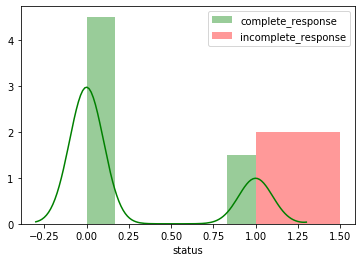

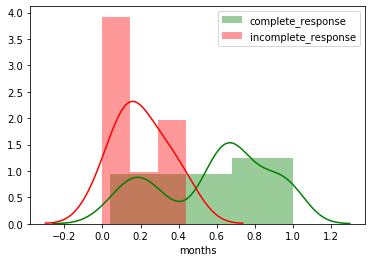

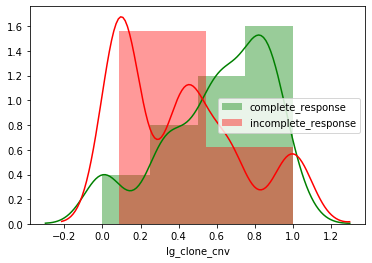

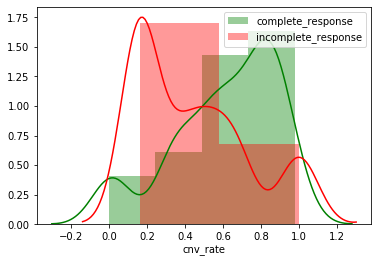

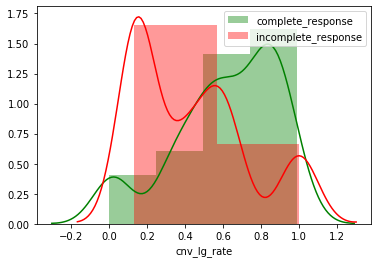

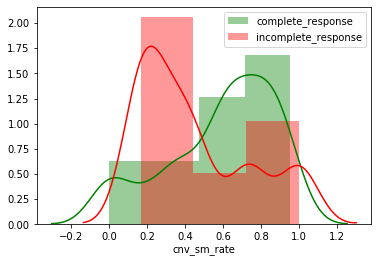

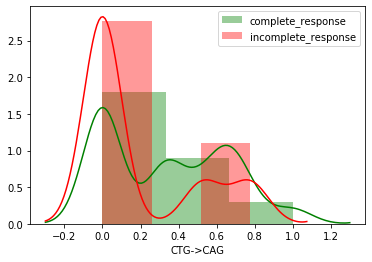

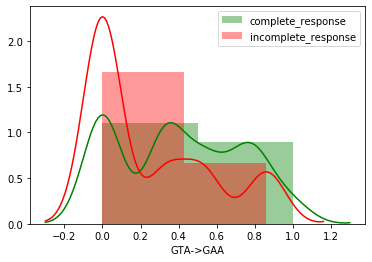

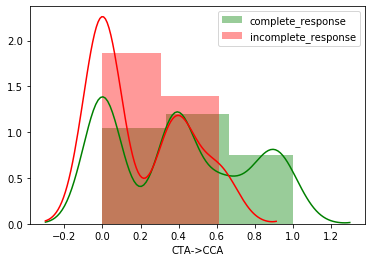

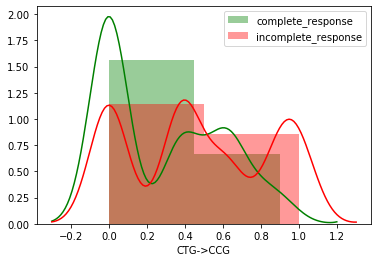

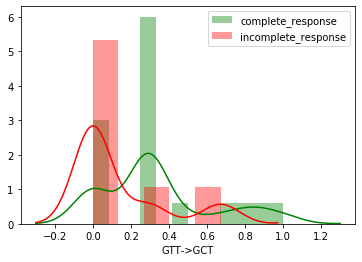

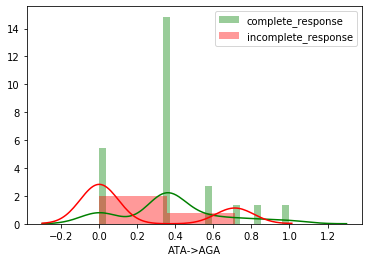

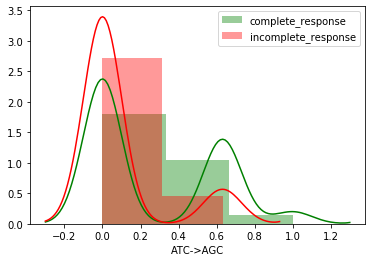

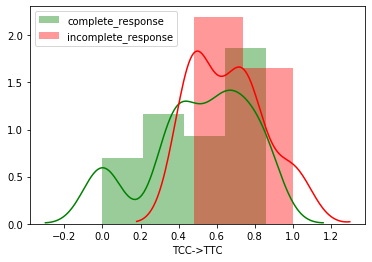

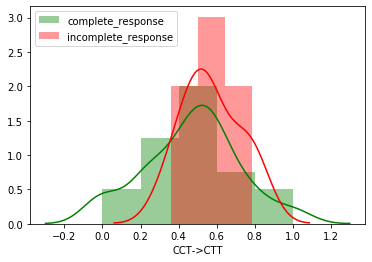

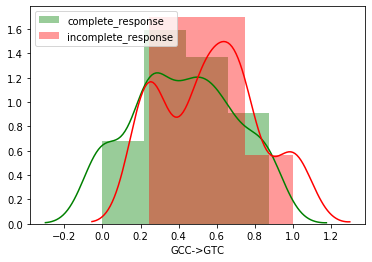

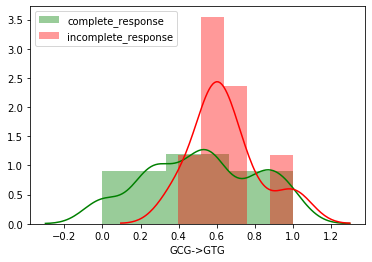

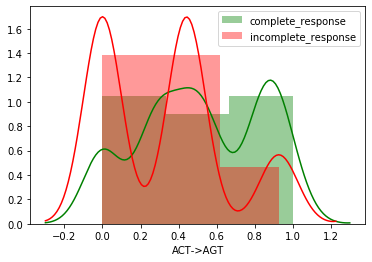

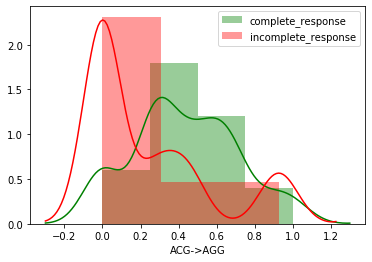

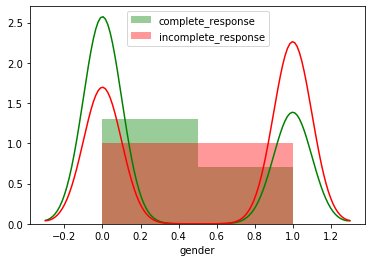

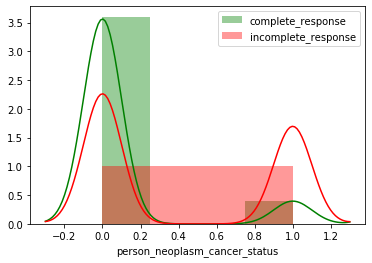

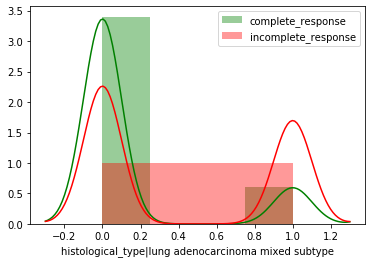

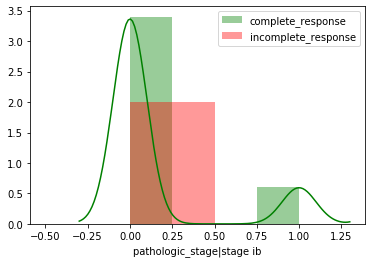

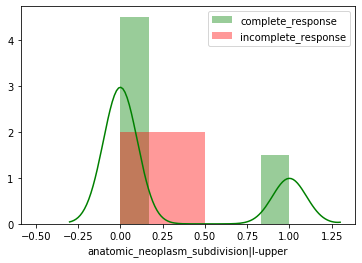

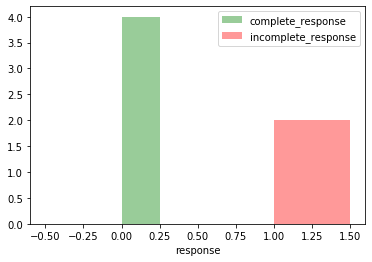

In [384]:
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

j = 1

for i in data_train_new.columns:
    
   
    
    sb.distplot(data_train_new[i][data_train_new['response']==0], color='g', label = "complete_response", kde_kws={'bw': 0.1})
    sb.distplot(data_train_new[i][data_train_new['response']==1], color='r', label = "incomplete_response", kde_kws={'bw': 0.1})
    j += 1
    mp.legend(loc='best')

    mp.show()


In [385]:

# fig = mp.figure(figsize = (45, 40))
# j = 1

# for i in data_train_new.columns:
    
#     mp.subplot(5, 2, j)
    
#     sb.distplot(data_train_new[i][data_train_new['response']==0], color='g', label = "complete_response ",kde_kws={'bw': 0.1})
#     sb.distplot(data_train_new[i][data_train_new['response']==1], color='r', label = "incomplete_response ",kde_kws={'bw': 0.1})
#     j += 1
#     mp.legend(loc='best')
# fig.suptitle('Lung Cancer data Analysis')
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)
# mp.show()

In [386]:
# methods 

In [387]:
print(data_train_new)
print(type(data_train_new))

    status    months  lg_clone_cnv  cnv_rate  cnv_lg_rate  cnv_sm_rate  \
0      0.0  0.631034      0.917781  0.912330     0.934436     0.859754   
1      1.0  0.660345      0.829808  0.827745     0.823420     0.834707   
2      0.0  0.876724      0.579013  0.592852     0.587238     0.600432   
3      1.0  0.143103      0.659735  0.666170     0.627718     0.735736   
4      1.0  0.681897      0.890640  0.908308     0.888906     0.944695   
5      0.0  0.668966      0.000000  0.000000     0.000000     0.000000   
6      0.0  1.000000      0.310748  0.341428     0.325503     0.371317   
7      1.0  0.437069      0.476621  0.522993     0.544465     0.460780   
8      1.0  0.146552      0.678533  0.709808     0.700943     0.725118   
9      0.0  0.552586      0.817243  0.815724     0.823420     0.796195   
10     1.0  0.132759      0.085508  0.161816     0.157951     0.166451   
11     1.0  0.262931      0.122031  0.172503     0.134530     0.249299   
12     0.0  0.038793      0.581647  0.

In [388]:
# # convert data_new to numpy array 

# #import numpy as np
# import pandas as pd
data_train_new=data_train_new.to_numpy()
print(data_train_new)

# data_new=pd.DataFrame(data_new)
# print(type(data_new))




[[0.         0.63103448 0.9177809  0.91233036 0.93443647 0.85975425
  0.77397603 0.66666667 0.38685281 0.38685281 0.67118774 0.71241437
  0.63092975 0.82961483 0.58851906 0.87706302 0.8648579  0.83682884
  0.55788589 0.         0.         1.         0.         0.
  0.        ]
 [1.         0.66034483 0.8298082  0.82774495 0.82341964 0.83470669
  0.52832083 0.52832083 0.77370561 0.61314719 0.28906483 0.56457503
  0.63092975 0.79663977 0.22767025 0.38776194 0.58048202 0.55788589
  0.44211411 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.87672414 0.57901287 0.59285163 0.58723773 0.60043174
  0.33333333 0.33333333 0.38685281 0.38685281 0.28906483 0.35620719
  0.         0.5568273  0.58851906 0.48930108 0.58048202 0.27894295
  0.64768546 0.         0.         0.         0.         0.
  0.        ]
 [1.         0.14310345 0.65973453 0.66617034 0.62771821 0.73573608
  0.52832083 0.33333333 0.         1.         0.         0.
  0.63092975 0.47962493 0.7563042  0.5

In [389]:
# split into input (X) and output (y) variables(response)
X_train_new = data_train_new[:, :-1]
y_train_new = data_train_new[:,-1]

In [390]:
X_train_new

array([[0.        , 0.63103448, 0.9177809 , 0.91233036, 0.93443647,
        0.85975425, 0.77397603, 0.66666667, 0.38685281, 0.38685281,
        0.67118774, 0.71241437, 0.63092975, 0.82961483, 0.58851906,
        0.87706302, 0.8648579 , 0.83682884, 0.55788589, 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.66034483, 0.8298082 , 0.82774495, 0.82341964,
        0.83470669, 0.52832083, 0.52832083, 0.77370561, 0.61314719,
        0.28906483, 0.56457503, 0.63092975, 0.79663977, 0.22767025,
        0.38776194, 0.58048202, 0.55788589, 0.44211411, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.87672414, 0.57901287, 0.59285163, 0.58723773,
        0.60043174, 0.33333333, 0.33333333, 0.38685281, 0.38685281,
        0.28906483, 0.35620719, 0.        , 0.5568273 , 0.58851906,
        0.48930108, 0.58048202, 0.27894295, 0.64768546, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.   

In [391]:
y_train_new

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [392]:
data_test_new=data_test_new.to_numpy()
print(data_test_new)


[[1.         0.21698113 0.67791582 0.6592074  0.6007203  0.81031653
  0.69897    0.67323871 0.         0.38685281 0.56457503 0.38685281
  0.         0.18946382 0.51335436 0.18453512 0.65897184 0.49398104
  0.77397603 1.         0.         1.         1.         0.
  0.        ]
 [0.         0.34034833 1.         1.         1.         0.99842273
  1.         1.         1.         0.77370561 1.         1.
  1.         1.         0.97167161 0.97398608 0.94277556 1.
  1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.287373   0.8975707  0.90467515 0.85803467 1.
  0.         0.         0.         0.         0.56457503 0.8982444
  0.         0.18946382 0.51335436 0.41702188 0.37516811 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [1.         0.55805515 0.30586178 0.30224215 0.34311745 0.29879657
  0.30103    0.23981247 0.8982444  0.38685281 0.82708748 0.38685281
  0.43067656 0.58538516 0.32389054 0.41702188 0.37516811 0.4254

In [393]:
X_test_new = data_test_new[:, :-1]
y_test_new = data_test_new[:,-1]

In [394]:
X_test_new

array([[1.        , 0.21698113, 0.67791582, 0.6592074 , 0.6007203 ,
        0.81031653, 0.69897   , 0.67323871, 0.        , 0.38685281,
        0.56457503, 0.38685281, 0.        , 0.18946382, 0.51335436,
        0.18453512, 0.65897184, 0.49398104, 0.77397603, 1.        ,
        0.        , 1.        , 1.        , 0.        ],
       [0.        , 0.34034833, 1.        , 1.        , 1.        ,
        0.99842273, 1.        , 1.        , 1.        , 0.77370561,
        1.        , 1.        , 1.        , 1.        , 0.97167161,
        0.97398608, 0.94277556, 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.287373  , 0.8975707 , 0.90467515, 0.85803467,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.56457503, 0.8982444 , 0.        , 0.18946382, 0.51335436,
        0.41702188, 0.37516811, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.   

In [395]:
y_test_new

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

# perform classification with 5 models (along with GridsearchCV)

78.57
[[0.6943229 ]
 [0.85313732]
 [0.88266413]
 [0.5685586 ]
 [0.89708027]
 [0.38684523]
 [0.73079211]
 [0.32006274]
 [0.76323965]
 [0.87258059]
 [0.67687221]
 [0.92400232]
 [0.66248025]
 [0.92026266]]
15.15
84.85
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        11
         1.0       0.50      0.33      0.40         3

    accuracy                           0.79        14
   macro avg       0.67      0.62      0.63        14
weighted avg       0.76      0.79      0.77        14



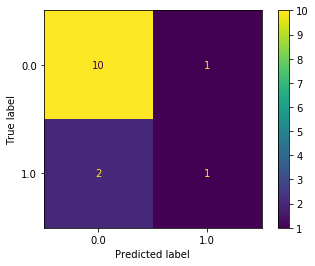

In [396]:
# BASE Support vector classifier

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sv = SVC(probability=True)
sv.fit(X_train_new, y_train_new)


# Accuracy score
y_pred_sv = sv.predict(X_test_new)
accu_score_sv = round(accuracy_score(y_test_new,y_pred_sv)*100,2)
print(accu_score_sv)

##ROC AUC
# using predict probability 
y_pred_proba_sv = sv.predict_proba(X_test_new)[:, :-1]
print(y_pred_proba_sv)
roc_auc_score_sv1 = round(roc_auc_score(y_test_new,y_pred_proba_sv)*100,2)
print(roc_auc_score_sv1)
# using decison function
y_score_sv = sv.decision_function(X_test_new)
# print(y_score_sv)
roc_auc_score_sv2 = round(roc_auc_score(y_test_new,y_score_sv)*100,2)
print(roc_auc_score_sv2)
#display ROC curve
# fpr,tpr,_ = roc_curve(y_test,y_score_sv)
# roc_display=RocCurveDisplay(tpr=tpr,fpr=fpr ).plot()
# plt.show




from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_sv))

# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_new, y_pred_sv, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sv.classes_)
disp.plot()

plt.show()

# as lung_dfs_car has balanced incomplete and complete responses
# so don't need to do over and under sampling and n_splits set to 4 in that case(for stratified cross validation)

In [397]:
# over and under sampling gridsearch - SVC 

# grid search 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC




# define pipeline
over = RandomOverSampler(sampling_strategy=0.5,random_state=1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
#steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
steps = [('o', over), ('u', under), ('m', SVC(random_state=1))]
pipeline = Pipeline(steps=steps)
stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
    

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}





param_grid={'m__C': [0.1, 1, 10, 100, 1000], 'm__kernel': ['linear', 'rbf'],'m__gamma':[1, 0.1, 0.01, 0.001,'scale']}
                                                 
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1')

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')




#can change refit parameter 

{'m__C': 10, 'm__gamma': 1, 'm__kernel': 'linear'}
f1 score: 0.8777777777777779
Test score: 0.7142857142857143


In [398]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'m__C': 10, 'm__gamma': 1, 'm__kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.33      0.33      0.33         3

    accuracy                           0.71        14
   macro avg       0.58      0.58      0.58        14
weighted avg       0.71      0.71      0.71        14



In [399]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.5757575757575757


In [403]:
# over and under sampling gridsearch - SVC 

# grid search 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



# define pipeline
over = RandomOverSampler(sampling_strategy=0.5,random_state=1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
#steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
steps = [('o', over), ('u', under), ('m', SVC(class_weight='balanced',random_state=1))]
pipeline = Pipeline(steps=steps)
stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
    
    

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}





param_grid={'m__C': [0.1, 1, 10, 100, 1000], 'm__kernel': ['linear', 'rbf'],'m__gamma':[1, 0.1, 0.01, 0.001,'scale']}
                                                 
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1')

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')



#can change refit parameter 



{'m__C': 1, 'm__gamma': 1, 'm__kernel': 'linear'}
f1 score: 0.888888888888889
Test score: 0.7142857142857143


In [404]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))

{'m__C': 1, 'm__gamma': 1, 'm__kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.33      0.33      0.33         3

    accuracy                           0.71        14
   macro avg       0.58      0.58      0.58        14
weighted avg       0.71      0.71      0.71        14



In [405]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.5757575757575757


In [411]:
# sklearn RF +random over and undersampling 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from statistics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



##


stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
    

param_grid = {
    'max_depth': [80,100],'max_features': [2, 3],
    'min_samples_split': [2,8,10],'n_estimators': [100, 200]
}


scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}



grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,refit='f1'
                           )

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')



#can change refit parameter 


{'max_depth': 80, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 200}
f1 score: 0.7851851851851853
Test score: 0.7142857142857143


In [412]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'max_depth': 80, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.71        14
   macro avg       0.38      0.45      0.42        14
weighted avg       0.60      0.71      0.65        14



In [413]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.45454545454545453


In [414]:
#evaluating a knn model with random oversampling and undersampling


from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score






stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
    
#param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}


param_grid = {
    'n_neighbors': [5,9,19],'weights': ['uniform','distance'],
    'metric': ['minkowski','manhattan','euclidean']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1')

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')




#can change refit parameter 



{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
f1 score: 0.862962962962963
Test score: 0.7142857142857143


In [415]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.33      0.33      0.33         3

    accuracy                           0.71        14
   macro avg       0.58      0.58      0.58        14
weighted avg       0.71      0.71      0.71        14



In [416]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.5757575757575757


In [417]:
# over and under sampling in MLP classifier 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# defining MLP MODEL 


stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}

    

param_grid = {
    'hidden_layer_sizes': [100,200,300],'alpha': [0.0001,0.001],
    'learning_rate': ['constant', 'adaptive'],'max_iter':[250,350]
}

grid_search = GridSearchCV(estimator=MLPClassifier(validation_fraction=0.1, random_state=1),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,refit='f1'
                           )

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')









{'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'max_iter': 250}
f1 score: 0.8925925925925926
Test score: 0.7142857142857143


In [418]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'max_iter': 250}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.33      0.33      0.33         3

    accuracy                           0.71        14
   macro avg       0.58      0.58      0.58        14
weighted avg       0.71      0.71      0.71        14



In [419]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.5757575757575757
